# Libraries

In [1]:
import yfinance as yf

# Data Collection

In [3]:
usd_inr=yf.download('USDINR=X', start='2024-01-01', end='2024-12-31', interval='1wk')

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [4]:
type(usd_inr)

pandas.core.frame.DataFrame

In [11]:
usd_inr.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,USDINR=X,USDINR=X,USDINR=X,USDINR=X,USDINR=X
0,2024-01-01,83.240601,83.360298,83.035004,83.248596,0
1,2024-01-08,83.076103,83.189697,82.779099,83.191101,0
2,2024-01-15,83.160599,83.230797,82.809998,82.872101,0
3,2024-01-22,83.146103,83.222504,81.513702,83.124702,0
4,2024-01-29,82.927597,83.212601,82.815002,83.121300,0


In [6]:
usd_inr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 53 entries, 2024-01-01 to 2024-12-30
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   (Close, USDINR=X)   53 non-null     float64
 1   (High, USDINR=X)    53 non-null     float64
 2   (Low, USDINR=X)     53 non-null     float64
 3   (Open, USDINR=X)    53 non-null     float64
 4   (Volume, USDINR=X)  53 non-null     int64  
dtypes: float64(4), int64(1)
memory usage: 2.5 KB


In [8]:
usd_inr.shape

(53, 5)

In [10]:
usd_inr.reset_index(inplace=True)

In [13]:
# keep only relvant columns
usd_inr = usd_inr[['Date', 'Close']]
usd_inr.columns= ['Date', 'USD_INR']

In [14]:
usd_inr.head()

,Date,USD_INR
0,2024-01-01,83.240601
1,2024-01-08,83.076103
2,2024-01-15,83.160599
3,2024-01-22,83.146103
4,2024-01-29,82.927597


In [28]:
output_file_name = "C:/Users/baska/Desktop/New Data_journey/gold_price_data_new_2024.csv"
usd_inr.to_csv(output_file_name, index=False)

In [15]:
gold_data_inr=yf.download('XAU', start='2024-01-01', end='2024-12-31', interval='1wk')

[*********************100%***********************]  1 of 1 completed

1 Failed download:
['XAU']: YFPricesMissingError('possibly delisted; no price data found  (1wk 2024-01-01 -> 2024-12-31)')


In [18]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
from io import StringIO

In [33]:
gold_dataset=pd.read_csv("C:/Users/baska/Desktop/New Data_journey/gold_price_data_new1_2024.csv")

In [34]:
gold_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       53 non-null     object 
 1   USD_INR    53 non-null     float64
 2   Gold rate  53 non-null     object 
dtypes: float64(1), object(2)
memory usage: 1.4+ KB


Data Analysis

In [41]:
gold_dataset.head()

,Date,USD_INR,Gold rate
0,2024-01-01,83.240601,5066.31
1,2024-01-08,83.076103,4955.58
2,2024-01-15,83.160599,4972.08
3,2024-01-22,83.146103,4987.35
4,2024-01-29,82.927597,4976.77


In [40]:
gold_dataset['Gold rate']=gold_dataset['Gold rate'].replace('₹','',regex=True).replace(',','',regex=True).astype(float)

EDA

In [42]:
# - Handle missing values - No
# - Handle imbalanced dataset - No
# - Handle outliers- Boxplot
# - Encode categorical features- No
# - Normalization vs Standardisation- Standardisation

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt 

<Axes: >

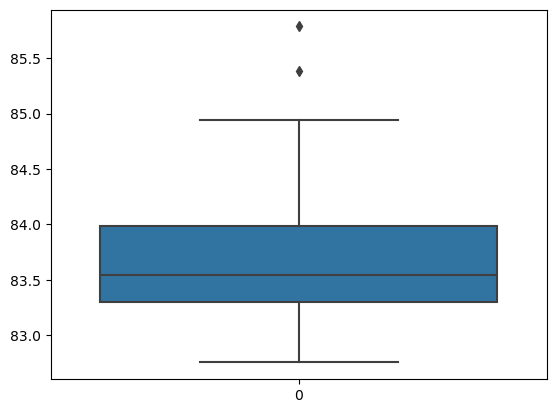

In [45]:
sns.boxplot(gold_dataset['USD_INR'])

In [47]:
gold_dataset['USD_INR'].min()

82.75229645

<Axes: xlabel='USD_INR', ylabel='Gold rate'>

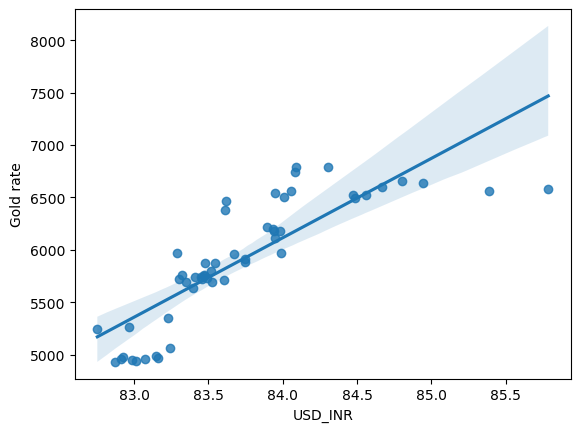

In [49]:
sns.regplot(x='USD_INR', y='Gold rate', data=gold_dataset)

# Model Training

In [50]:
x= gold_dataset[['USD_INR']]
y=gold_dataset[['Gold rate']]

In [51]:
type(x)

pandas.core.frame.DataFrame

In [52]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=42)

In [54]:
x_train.shape, x_test.shape

((47, 1), (6, 1))

In [55]:
from sklearn.preprocessing import StandardScaler

In [56]:
scaler = StandardScaler()

In [59]:
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [60]:
x_test_scaled

array([[-0.37619593],
       [ 0.53097266],
       [ 1.31302272],
       [-0.49602609],
       [ 0.58955971],
       [-1.12965796]])

In [61]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [62]:
regressor.fit(x_train_scaled, y_train)

LinearRegression()

In [64]:
regressor.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [65]:
regressor.coef_

array([[465.73867563]])

In [66]:
regressor.intercept_

array([5884.6487234])

In [71]:
#y=mx+b
m= regressor.coef_[0][0]
b=regressor.intercept_[0]

In [72]:
m,b

(465.73867563110593, 5884.648723404249)

In [74]:
x_train_predict = regressor.predict(x_train_scaled)

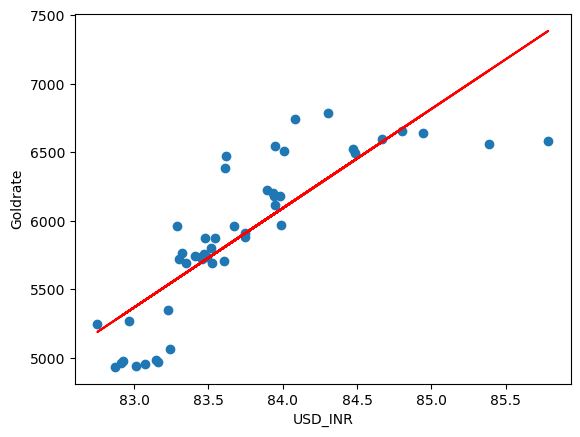

In [78]:
plt.scatter(x_train,y_train)
plt.plot(x_train, x_train_predict, color='r')
plt.xlabel("USD_INR")
plt.ylabel("Goldrate")

plt.show()

In [79]:
x_test_predict = regressor.predict(x_test_scaled)

In [80]:
x_test_predict

array([[5709.43972853],
       [6131.94322469],
       [6496.17418616],
       [5653.63019149],
       [6159.22948418],
       [5358.52331954]])

In [83]:
y_test

,Gold rate
19,5754.39
41,6563.33
47,6524.06
12,5638.52
43,6795.35
5,4953.90


In [85]:
from sklearn.metrics import mean_squared_error

In [87]:
mean_squared_error(y_test, x_test_predict)

126248.39244735228

# Hyperparameter optimization

In [88]:
from sklearn.model_selection import RandomizedSearchCV
param_space = {'copy_X': [True,False], 
               'fit_intercept': [True,False], 
               'n_jobs': [1,5,10,15,None], 
               'positive': [True,False]}

In [89]:
search = RandomizedSearchCV(regressor, param_space, n_iter=50, cv=5)

In [91]:
search.fit(x_train_scaled, y_train)

C:\Users\baska\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 40 is smaller than n_iter=50. Running 40 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=LinearRegression(), n_iter=50,
                   param_distributions={'copy_X': [True, False],
                                        'fit_intercept': [True, False],
                                        'n_jobs': [1, 5, 10, 15, None],
                                        'positive': [True, False]})

In [92]:
search.best_params_

{'positive': True, 'n_jobs': 1, 'fit_intercept': True, 'copy_X': True}

In [98]:
tuned_model = LinearRegression(positive= True, n_jobs= 1, fit_intercept= True, copy_X= True)

In [95]:
tuned_model.fit(x_train_scaled, y_train)

LinearRegression(n_jobs=1, positive=True)

In [96]:
tuned_model.coef_

array([[465.73867563]])

In [97]:
tuned_model.intercept_

array([5884.6487234])

# MLOPS

In [104]:
# Save the Model
# Build Interface
# Connect Model & Interface

In [101]:
!pip install gradio

     ---------------------------------------- 0.0/42.9 kB ? eta -:--:--
     ---------------------------------------- 42.9/42.9 kB 2.2 MB/s eta 0:00:00
     ---------------------------------------- 0.0/68.6 kB ? eta -:--:--
     ---------------------------------------- 68.6/68.6 kB 1.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/63.5 MB ? eta -:--:--
   ---------------------------------------- 0.3/63.5 MB 10.6 MB/s eta 0:00:06
    --------------------------------------- 0.9/63.5 MB 11.2 MB/s eta 0:00:06
    --------------------------------------- 1.5/63.5 MB 12.2 MB/s eta 0:00:06
   - -------------------------------------- 2.0/63.5 MB 10.4 MB/s eta 0:00:06
   - -------------------------------------- 2.7/63.5 MB 12.2 MB/s eta 0:00:05
   -- ------------------------------------- 3.3/63.5 MB 12.2 MB/s eta 0:00:05
   -- ------------------------------------- 3.8/63.5 MB 12.1 MB/s eta 0:00:05
   -- ------------------------------------- 4.4/63.5 MB 12.1 MB/s eta 0:00:05
  

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-cloud-auth 0.1.4 requires pydantic<2.0, but you have pydantic 2.11.10 which is incompatible.


In [102]:
import gradio as gr

In [103]:
import pickle
import numpy as np

In [106]:
pickle.dump(regressor,open('regressor.pkl','wb'))

In [107]:
regressor_reloaded=pickle.load(open('regressor.pkl','rb'))

In [108]:
regressor_reloaded.coef_

array([[465.73867563]])

In [109]:
pickle.dump(scaler,open('scaler.pkl','wb'))

In [120]:
scaler = pickle.load(open('scaler.pkl','rb'))

In [121]:
def calculate_goldrate(usd_inr):
    scaled_input = scaler.transform(np.array(usd_inr).reshape(1,-1))
    return round(regressor.predict(scaled_input)[0][0],2)
  

In [122]:
calculate_goldrate(80)

C:\Users\baska\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


3197.66

In [123]:
demo = gr.Interface(
    fn=calculate_goldrate,
    inputs=["number"],
    outputs=["number"],
    title="How much is 1g of gold in India NOW?"
)

C:\Users\baska\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [119]:
demo.launch(share=True)

* Running on local URL:  http://127.0.0.1:7860
* Running on public URL: https://2754f6854421c42956.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


C:\Users\baska\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
